In [1]:
import dlib
import cv2

import matplotlib.pyplot as plt
import numpy as np

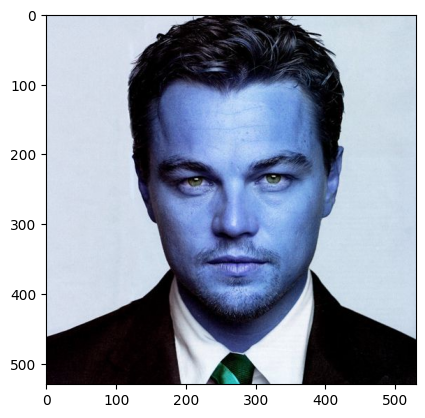

In [2]:
image=cv2.imread("../images/dst_img.jpg")
plt.imshow(image)

In [3]:
image.shape

(530, 530, 3)

In [4]:
face_detector=dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [5]:
#Single channel for the image
face_detection=face_detector(image,1)

In [6]:
face_detection

rectangles[[(141, 171) (409, 439)]]

In [7]:
#Plot a sample point as a circle in the image
#cv2.circle(image,(300,300),2,(255,0,0),2)

In [7]:
for face in face_detection:
    #Rectangle for face
    #print(face)
    points=points_detector(image,face)
    #68 landmarks
    #print(points)
    for point in points.parts():
        cv2.circle(image,(point.x,point.y),2,(255,0,0),2)

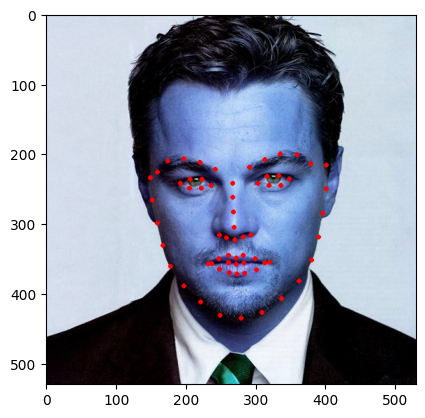

In [8]:
#Image with 68 landmarks for face
plt.imshow(image)

In [9]:
#Extract all these landmark points
points_list=[]
for n in range(0,68):
    x=points.part(n).x
    y=points.part(n).y
    points_list+=[(x,y)]

points=np.array(points_list,np.int32)

In [10]:
points.shape

(68, 2)

In [11]:
#Create convex hull
convexhull=cv2.convexHull(points=points)

In [12]:
convexhull.shape

(21, 1, 2)

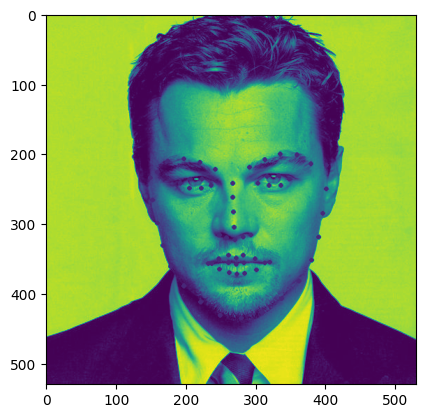

In [13]:
#Convert image to grayscale and apply convexhull
img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [14]:
img_gray.shape

(530, 530)

In [15]:
#Create mask of gray image
mask=np.zeros_like(img_gray)

In [16]:
#Plot convexhull on mask
cv2.fillConvexPoly(mask,convexhull,255).shape

(530, 530)

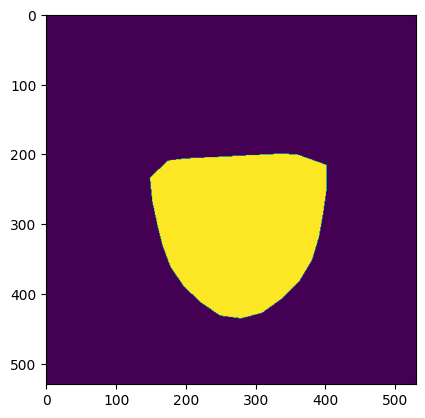

In [17]:
plt.imshow(mask)

In [25]:
#Apply above functions to the source image
source=cv2.imread("../images/src_img.jpg")
#Convert image to grayscale and apply convexhull
source_gray=cv2.cvtColor(source,cv2.COLOR_BGR2GRAY)
#Create mask of gray image
mask=np.zeros_like(source_gray)
face_detector=dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
#Rectangle to detect face
source_faces=face_detector(source_gray)

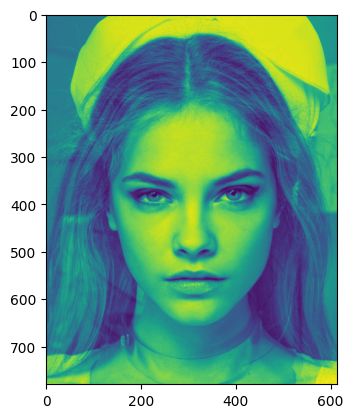

In [26]:
plt.imshow(source_gray)

In [20]:
source_faces

rectangles[[(115, 280) (486, 651)]]

In [27]:
#Loop through the rectangle and extract the 68 points
for face in source_faces:
    #Get 68 landmarks for face
    points=points_detector(source_gray,face)
    points_list=[]
    #Extract and add the 68 landmark points
    for n in range(0,68):
        x=points.part(n).x
        y=points.part(n).y
        points_list+=[(x,y)]

points=np.array(points_list,np.int32)
#Create convex hull
convexhull=cv2.convexHull(points=points)
#Plot convexhull on mask
cv2.fillConvexPoly(mask,convexhull,255)
source_face=cv2.bitwise_and(source,source,mask=mask)

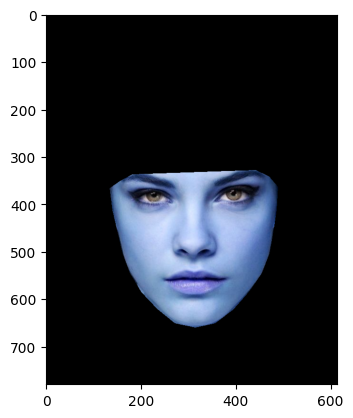

In [28]:
plt.imshow(source_face)

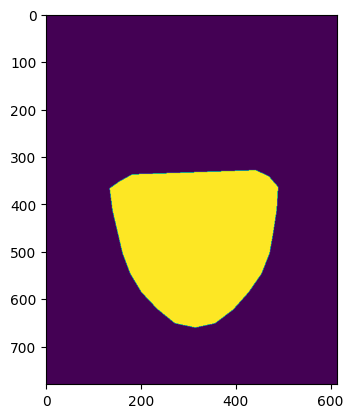

In [29]:
plt.imshow(mask)

In [30]:
#Create triangles to map this to destination image
#Get the bounding rectangle coordinates-->x,y,width,height
rect=cv2.boundingRect(convexhull)
#Subdivide the bounding rectangle to 2D to extract triangles
subdiv=cv2.Subdiv2D(rect)
#Pass the 68 landmark points to it
subdiv.insert(points_list)
#get the triangles;(x,y) coordinates of the 3 vertices for each triangle
triangles=subdiv.getTriangleList()
triangles=np.array(triangles,dtype=np.int32)

In [31]:
triangles

array([[194, 386, 134, 367, 154, 353],
       [134, 367, 194, 386, 140, 413],
       [278, 505, 238, 398, 309, 455],
       [238, 398, 278, 505, 213, 397],
       [310, 592, 271, 651, 294, 590],
       [271, 651, 310, 592, 314, 660],
       [151, 458, 140, 413, 194, 386],
       [295, 557, 272, 549, 295, 540],
       [272, 549, 295, 557, 294, 561],
       [161, 503, 151, 458, 213, 397],
       [309, 516, 310, 544, 295, 540],
       [310, 544, 309, 516, 326, 540],
       [177, 546, 161, 503, 278, 505],
       [342, 505, 308, 486, 309, 455],
       [308, 486, 342, 505, 326, 510],
       [201, 586, 177, 546, 249, 560],
       [278, 505, 309, 455, 308, 486],
       [234, 621, 201, 586, 249, 560],
       [238, 398, 240, 377, 261, 394],
       [240, 377, 238, 398, 215, 375],
       [271, 651, 234, 621, 271, 581],
       [275, 361, 261, 394, 240, 377],
       [261, 394, 275, 361, 310, 391],
       [356, 651, 314, 660, 328, 591],
       [394, 622, 356, 651, 351, 582],
       [161, 503, 213, 39

In [32]:
#Plot the triangles on image;by extracting the points and drawing lines
for t in triangles:
    pt1=(t[0],t[1])
    pt2=(t[2],t[3])
    pt3=(t[4],t[5])

    cv2.line(source,pt1,pt2,(0,0,255))
    cv2.line(source,pt2,pt3,(0,0,255))
    cv2.line(source,pt1,pt3,(0,0,255))



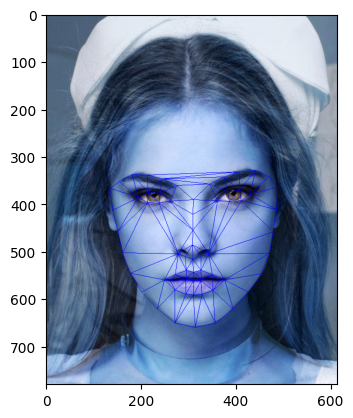

In [33]:
plt.imshow(source)

In [34]:
#Get the index id of triangles
def index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

In [35]:
#Get the ids of each point
triangles_id=[]
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])
  #Get the ids of all points
  id_pt1 = np.where((points == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  id_pt2 = np.where((points == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  id_pt3 = np.where((points == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)
  
  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

In [36]:
triangles_id

[[36, 0, 17],
 [0, 36, 1],
 [31, 40, 29],
 [40, 31, 41],
 [57, 7, 58],
 [7, 57, 8],
 [2, 1, 36],
 [61, 49, 50],
 [49, 61, 67],
 [3, 2, 41],
 [33, 51, 50],
 [51, 33, 52],
 [4, 3, 31],
 [35, 30, 29],
 [30, 35, 34],
 [5, 4, 48],
 [31, 29, 30],
 [6, 5, 48],
 [40, 38, 39],
 [38, 40, 37],
 [7, 6, 59],
 [21, 39, 38],
 [39, 21, 27],
 [9, 8, 56],
 [10, 9, 55],
 [3, 41, 31],
 [11, 10, 54],
 [37, 40, 41],
 [12, 11, 54],
 [29, 40, 39],
 [13, 12, 54],
 [18, 37, 36],
 [37, 18, 19],
 [14, 13, 35],
 [36, 17, 18],
 [15, 14, 46],
 [16, 15, 45],
 [25, 44, 24],
 [44, 25, 45],
 [42, 29, 28],
 [29, 42, 35],
 [35, 42, 47],
 [22, 23, 43],
 [23, 22, 20],
 [19, 20, 37],
 [20, 19, 24],
 [23, 20, 24],
 [44, 47, 43],
 [47, 44, 46],
 [42, 27, 22],
 [27, 42, 28],
 [20, 21, 38],
 [21, 20, 22],
 [22, 43, 42],
 [43, 23, 44],
 [21, 22, 27],
 [24, 44, 23],
 [26, 45, 25],
 [45, 26, 16],
 [27, 28, 39],
 [13, 54, 35],
 [28, 29, 39],
 [54, 55, 64],
 [55, 54, 10],
 [49, 31, 50],
 [31, 49, 48],
 [61, 66, 67],
 [66, 61, 62],
 [

In [37]:
#No of triangles
len(triangles_id)

111

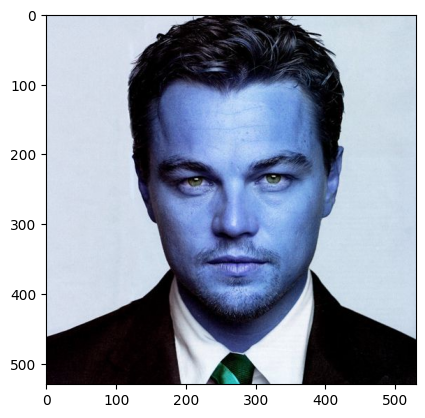

In [38]:
destination = cv2.imread("..\images\dst_img.jpg")

destination_grey = cv2.cvtColor(destination, cv2.COLOR_BGR2GRAY)

destination_faces= face_detector(destination_grey)
for face in destination_faces:
    points_predict2 = points_detector(destination_grey, face)
    points_list2 = []
    for n in range(0, 68):
        x = points_predict2.part(n).x
        y = points_predict2.part(n).y
        points_list2.append((x, y))
    points2 = np.array(points_list2, np.int32)
    convexhull2 = cv2.convexHull(points2)

plt.imshow(destination)

In [39]:
#Create a blank image with same shape as the destination image
destination_new_face = np.zeros_like(destination, np.uint8)

In [61]:
#Map the triangles from source images to destination image using the indices
for triangle_index in triangles_id:
    #Get the individual points corresponding to the indices in src image
    tr1_pt1 = points_list[triangle_index[0]]
    tr1_pt2 = points_list[triangle_index[1]]
    tr1_pt3 = points_list[triangle_index[2]]
    #Get the triangle corresponding to the 3 points in src image
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    #Create bounding rectangle for triangle in src image
    rect1 = cv2.boundingRect(triangle1)
    (x1, y1, w1, h1) = rect1
    #Get cropped triangle for src image
    cropped_triangle = source[y1: y1 + h1, x1: x1 + w1]
    #Create mask for triangle
    cropped_tr1_mask = np.zeros((h1, w1), np.uint8)
    #Get 68 landmark points 
    points = np.array([[tr1_pt1[0] - x1, tr1_pt1[1] - y1],
                      [tr1_pt2[0] - x1, tr1_pt2[1] - y1],
                      [tr1_pt3[0] - x1, tr1_pt3[1] - y1]], np.int32)
    #Fill mask with 68 landmark points 
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    #Extract cropped triangle of src image
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)
    #Repeat steps for the destination image to get cropped triangle
    #Iterating through index ids of src image to get corresponding points in destination image for mapping
    tr2_pt1 = points_list2[triangle_index[0]]
    tr2_pt2 = points_list2[triangle_index[1]]
    tr2_pt3 = points_list2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x2, y2, w2, h2) = rect2
    #cropped_triangle2 = destination[y2: y2 + h2, x2: x2 + w2]
    cropped_tr2_mask = np.zeros((h2, w2), np.uint8)
    #68 landmark images from destination
    points2 = np.array([[tr2_pt1[0] - x2, tr2_pt1[1] - y2],
                       [tr2_pt2[0] - x2, tr2_pt2[1] - y2],
                       [tr2_pt3[0] - x2, tr2_pt3[1] - y2]], np.int32)
    #cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    # cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
    #                                    mask=cropped_tr2_mask)

    points = np.float32(points)
    points2 = np.float32(points2)
    #Get the matrix corresponding to the 68 landmark points
    M = cv2.getAffineTransform(points, points2)
    #Apply the matrix on the cropped triangle
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))
    #using mask of destination image
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


    destination_new_face_rect_area = destination_new_face[y2: y2 + h2, x2: x2 + w2]
    destination_new_face_rect_area_gray = cv2.cvtColor(destination_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    #To adjust the color differences
    _, mask_triangles_designed = cv2.threshold(destination_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    destination_new_face_rect_area = cv2.add(destination_new_face_rect_area, warped_triangle)
    destination_new_face[y2: y2 + h2, x2: x2 + w2] = destination_new_face_rect_area

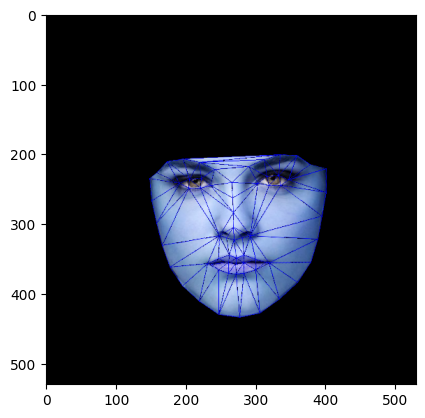

In [52]:
#Mask of source image with the destination face extracted
plt.imshow(destination_new_face)

In [53]:
destination_face_mask = np.zeros_like(destination_grey)
destination_head_mask = cv2.fillConvexPoly(destination_face_mask, convexhull2, 255)
destination_face_mask = cv2.bitwise_not(destination_head_mask)

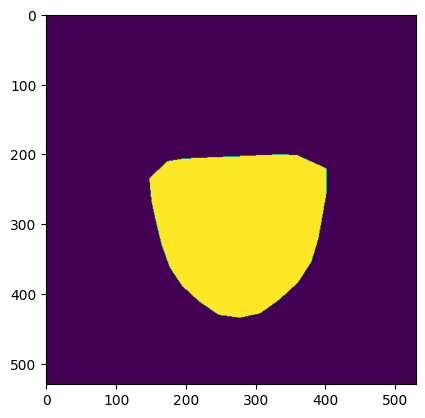

In [54]:
plt.imshow(destination_head_mask)

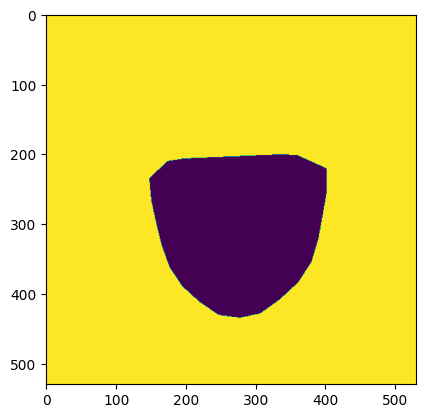

In [55]:
plt.imshow(destination_face_mask)

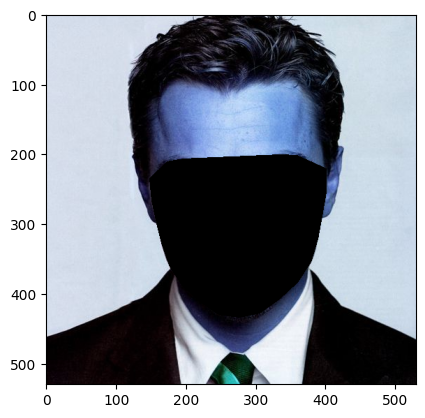

In [56]:
destination_noface = cv2.bitwise_and(destination, destination, mask=destination_face_mask)
plt.imshow(destination_noface)

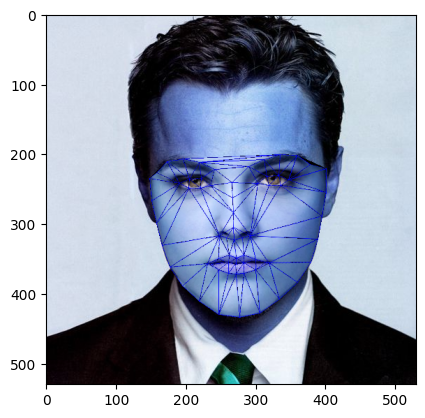

In [57]:
result = cv2.add(destination_noface, destination_new_face)
plt.imshow(result)

In [58]:
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

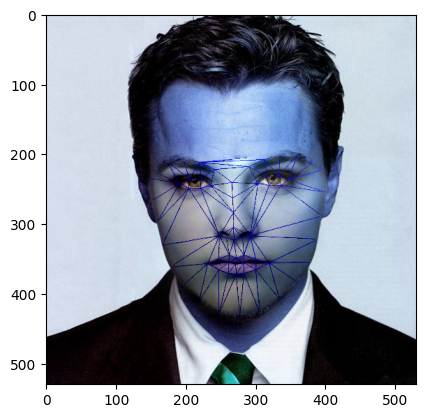

In [59]:
normal_clone = cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.NORMAL_CLONE)
plt.imshow(normal_clone);

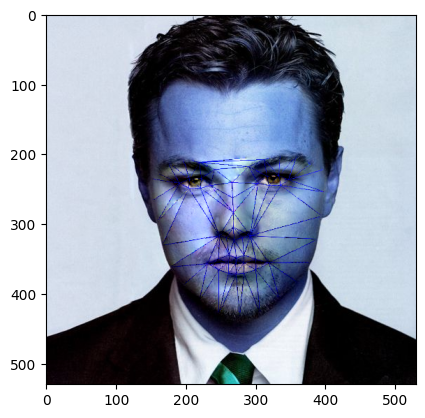

In [60]:
mixed_clone = cv2.seamlessClone(result, destination, destination_head_mask, center_face, cv2.MIXED_CLONE)
plt.imshow(mixed_clone);